In [1]:
import numpy as np
from sklearn import metrics
from PIL import Image
import scipy as sc
import os

FILES_DIR = os.path.abspath('tmp')

In [2]:
def applyMeanFilter(image, imageName, n = 3):
    offset = n // 2

    image = np.asarray(image)
    imageY, imageX = image.shape

    filteredImage = np.zeros((imageY, imageX))

    for x in range(offset, imageX - offset):
        for y in range(offset, imageY - offset):
            sum = 0

            for i in range(n):
                for j in range(n):
                    sum += image[y - offset + i, x - offset + j]
            
            filteredImage[y, x] = sum / (n ** 2)
    
    filteredImage = Image.fromarray(filteredImage.astype(np.uint8))
    filteredImage.show()
    filteredImage.save(f'{FILES_DIR}/correction/{imageName}_meanFilter_{n}.bmp')

def applyMedianFilter(image, imageName, n = 3):
    offset = n // 2

    image = np.asarray(image)
    imageY, imageX = image.shape

    filteredImage = np.zeros((imageY, imageX))

    for x in range(offset, imageX - offset):
        for y in range(offset, imageY - offset):
            filteredImage[y, x] = np.median(image[y - offset:y - offset + n, x - offset:x - offset + n])

    filteredImage = Image.fromarray(filteredImage.astype(np.uint8))
    filteredImage.show()
    filteredImage.save(f'{FILES_DIR}/correction/{imageName}_medianFilter_{n}.bmp')

def applyGaussianFilter(image, imageName, n = 3):
    pascalLine = sc.linalg.pascal(n, kind = 'lower')[-1]
    mask = 1 / np.sum(np.outer(pascalLine, pascalLine)) * np.outer(pascalLine, pascalLine)

    offset = n // 2

    image = np.asarray(image)
    imageY, imageX = image.shape

    filteredImage = np.zeros((imageY, imageX))

    for x in range(offset, imageX - offset):
        for y in range(offset, imageY - offset):
            sum = 0

            for i in range(n):
                for j in range(n):
                    sum += image[y - offset + j, x - offset + i] * mask[j, i]
            
            filteredImage[y, x] = sum
    
    filteredImage = Image.fromarray(filteredImage.astype(np.uint8))
    filteredImage.show()
    filteredImage.save(f'{FILES_DIR}/correction/{imageName}_gaussianFilter_{n}.bmp')

def applyModeFilter(image, imageName, n = 3):
    offset = n // 2

    image = np.asarray(image)
    imageY, imageX = image.shape

    filteredImage = np.zeros((imageY, imageX))

    for x in range(offset, imageX - offset):
        for y in range(offset, imageY - offset):
            filteredImage[y, x] = np.argmax(np.bincount(image[y - offset:y - offset + n, x - offset:x - offset + n].flatten()))

    filteredImage = Image.fromarray(filteredImage.astype(np.uint8))
    filteredImage.show()
    filteredImage.save(f'{FILES_DIR}/correction/{imageName}_modeFilter_{n}.bmp')

def applyLaplacianFilter(image, imageName, mask, maskID, normalized = False, n = 3):
    mask = np.asarray(mask)
    offset = n // 2

    if normalized:
        mask = 1 / (n ** 2) * mask

    image = np.asarray(image)
    imageY, imageX = image.shape

    filteredImage = np.zeros((imageY, imageX))

    for x in range(offset, imageX - offset):
        for y in range(offset, imageY - offset):
            for i in range(n):
                for j in range(n):
                    filteredImage[y, x] += image[y - offset + j, x - offset + i] * mask[j, i]
    
    filteredImage = Image.fromarray(image.astype(np.uint8) + filteredImage.astype(np.uint8))
    filteredImage.show()

    nameAux = f'{imageName}_laplacian'
    if normalized:
        nameAux = f'{imageName}_normalizedLaplacian'

    filteredImage.save(f'{FILES_DIR}/correction/{nameAux}Filtered_{maskID}.bmp')

def computeMetrics(imageA):
    imageA = np.asarray(imageA).astype(np.float32)
    images = sorted(os.listdir(f'{FILES_DIR}/correction/'))

    for imagem in images:
        imageB = np.asarray(Image.open(f'{FILES_DIR}/correction/{imagem}')).astype(np.float32)

        medianAbsoluteError = metrics.mean_absolute_error(imageA.ravel(), imageB.ravel())
        meanSquaredError = metrics.mean_squared_error(imageA.ravel(), imageB.ravel())

        print(f'{imagem}:\nErro Médio Absoluto = {medianAbsoluteError} / Erro Médio Quadrático: {meanSquaredError}\n')

Imagem Original:


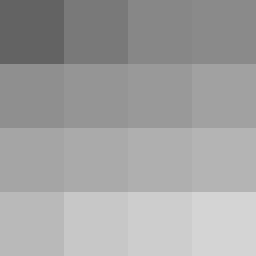

Imagem imageE_gaussianNoise.bmp:


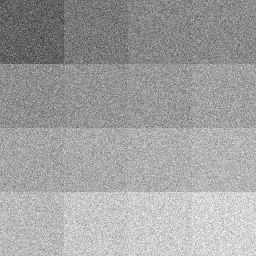

Filtro da Média:


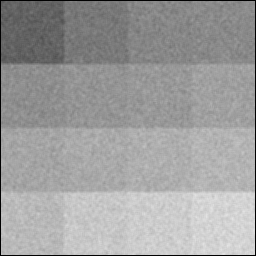

Filtro da Mediana:


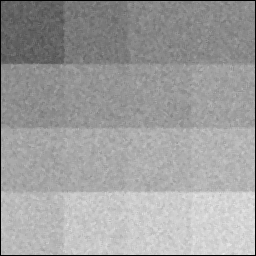

Filtro Gaussiano:


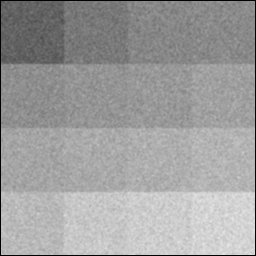

Filtro da Moda:


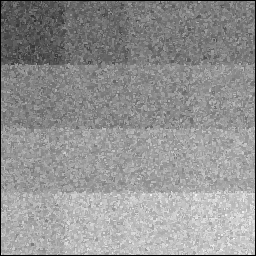

Filtro Laplaciano (0):


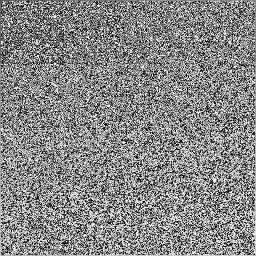

Filtro Laplaciano Normalizado (0):


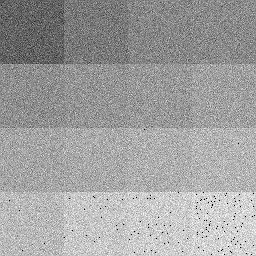

Filtro Laplaciano (1):


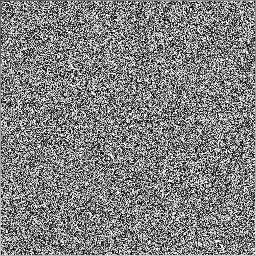

Filtro Laplaciano Normalizado (1):


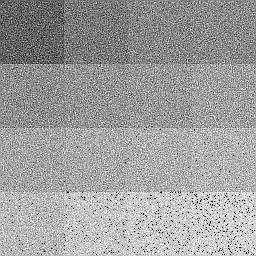

Imagem imageE_saltPepperNoise.bmp:


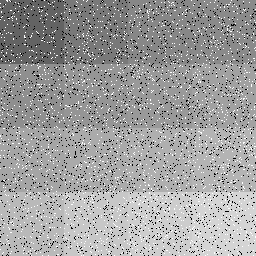

Filtro da Média:


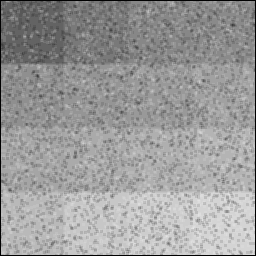

Filtro da Mediana:


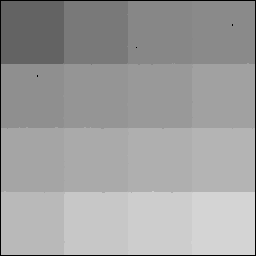

Filtro Gaussiano:


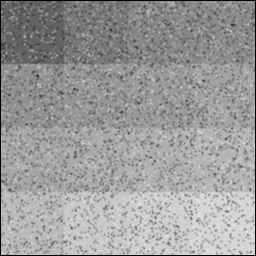

Filtro da Moda:


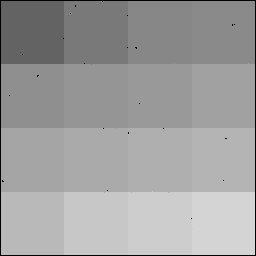

Filtro Laplaciano (0):


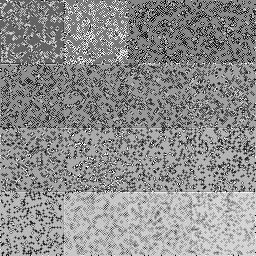

Filtro Laplaciano Normalizado (0):


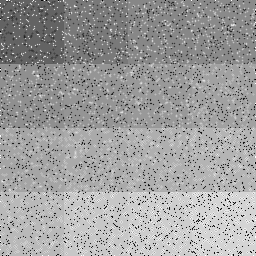

Filtro Laplaciano (1):


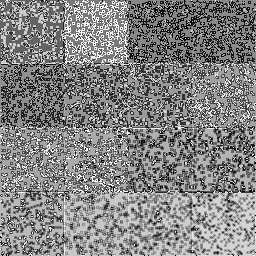

Filtro Laplaciano Normalizado (1):


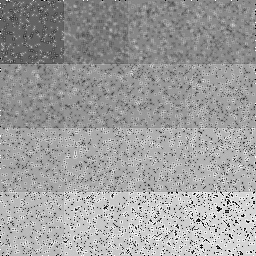

imageE_gaussianNoise_gaussianFilter_3.bmp:
Erro Médio Absoluto = 7.094512939453125 / Erro Médio Quadrático: 458.3736572265625

imageE_gaussianNoise_laplacianFiltered_0.bmp:
Erro Médio Absoluto = 62.9503173828125 / Erro Médio Quadrático: 6227.7802734375

imageE_gaussianNoise_laplacianFiltered_1.bmp:
Erro Médio Absoluto = 71.12049865722656 / Erro Médio Quadrático: 7414.4111328125

imageE_gaussianNoise_meanFilter_3.bmp:
Erro Médio Absoluto = 6.665069580078125 / Erro Médio Quadrático: 452.7832946777344

imageE_gaussianNoise_medianFilter_3.bmp:
Erro Médio Absoluto = 7.4383544921875 / Erro Médio Quadrático: 463.884765625

imageE_gaussianNoise_modeFilter_3.bmp:
Erro Médio Absoluto = 18.691864013671875 / Erro Médio Quadrático: 810.866455078125

imageE_gaussianNoise_normalizedLaplacianFiltered_0.bmp:
Erro Médio Absoluto = 17.333663940429688 / Erro Médio Quadrático: 541.5827026367188

imageE_gaussianNoise_normalizedLaplacianFiltered_1.bmp:
Erro Médio Absoluto = 23.415740966796875 / Erro Médio Qu

In [3]:
os.makedirs(f'{FILES_DIR}/correction/', exist_ok = True)

noiseImages = [
    'imageE_gaussianNoise.bmp',
    'imageE_saltPepperNoise.bmp'
]

print('Imagem Original:')

originalImage = Image.open(f'{FILES_DIR}/original/imageE.bmp').convert('L')
originalImage.show()

laplacianMasks = [
    [[0, -1, 0], [-1, 4, -1], [0, -1, 0]],
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]
]

for imageName in noiseImages:
    print(f'Imagem {imageName}:')

    noiseImage = Image.open(f'{FILES_DIR}/noise/{imageName}').convert('L')
    imageName = str.split(imageName, '.')[0]

    noiseImage.show()

    print(f'Filtro da Média:')
    applyMeanFilter(noiseImage, imageName)

    print(f'Filtro da Mediana:')
    applyMedianFilter(noiseImage, imageName)

    print(f'Filtro Gaussiano:')
    applyGaussianFilter(noiseImage, imageName)

    print(f'Filtro da Moda:')
    applyModeFilter(noiseImage, imageName)

    for i, mask in enumerate(laplacianMasks):
        print(f'Filtro Laplaciano ({i}):')
        applyLaplacianFilter(noiseImage, imageName, mask, i)

        print(f'Filtro Laplaciano Normalizado ({i}):')
        applyLaplacianFilter(noiseImage, imageName, mask, i, True)

computeMetrics(originalImage)